In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [64]:
df_train = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/data/data_hotel/train.csv")

In [65]:
df_train.head()

,Review,FACILITIES#CLEANLINESS,FACILITIES#COMFORT,FACILITIES#DESIGN&FEATURES,FACILITIES#GENERAL,FACILITIES#MISCELLANEOUS,FACILITIES#PRICES,FACILITIES#QUALITY,FOOD&DRINKS#MISCELLANEOUS,FOOD&DRINKS#PRICES,...,ROOM_AMENITIES#PRICES,ROOM_AMENITIES#QUALITY,ROOMS#CLEANLINESS,ROOMS#COMFORT,ROOMS#DESIGN&FEATURES,ROOMS#GENERAL,ROOMS#MISCELLANEOUS,ROOMS#PRICES,ROOMS#QUALITY,SERVICE#GENERAL
0,Trong các góc phòng chưa được dọn dẹp sạch sẽ ...,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1,Lễ tân làm việc chậm chạp.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,View chưa được đẹp cho lắm.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Máy lạnh không nên đặt ở vị trí đối diện giường.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cac quan xung quanh khach chua co nhieu.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, Trong các góc phòng chưa được dọn dẹp sạch sẽ khi khách đến to Bồn rửa mặt bị tắc
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   FACILITIES#CLEANLINESS          2500 non-null   int64
 1   FACILITIES#COMFORT              2500 non-null   int64
 2   FACILITIES#DESIGN&FEATURES      2500 non-null   int64
 3   FACILITIES#GENERAL              2500 non-null   int64
 4   FACILITIES#MISCELLANEOUS        2500 non-null   int64
 5   FACILITIES#PRICES               2500 non-null   int64
 6   FACILITIES#QUALITY              2500 non-null   int64
 7   FOOD&DRINKS#MISCELLANEOUS       2500 non-null   int64
 8   FOOD&DRINKS#PRICES              2500 non-null   int64
 9   FOOD&DRINKS#QUALITY             2500 non-null   int64
 10  FOOD&DRINKS#STYLE&OPTIONS       2500 non-null   int64
 11  HOTEL#CLEANLINESS               2500 non-null   int64


In [51]:
# Labels for sentiments
sentiment_labels = [2, 3, 1]  # 1=Negative, 2=Neutral, 3=Positive

# Function to calculate sentiment distribution
def calculate_sentiment_distribution(df, sentiment_labels):
    results = {}
    for column in df.columns:
        counts = df[column].value_counts().reindex(sentiment_labels, fill_value=0)
        # Exclude sentiment category 'None'
        counts = counts.drop(labels=0, errors='ignore')
        results[column] = counts
    sentiment_distribution = pd.DataFrame(results).T.rename(columns={2: 'Negative', 3: 'Neutral', 1: 'Positive'})
    
    # Calculate row and column totals
    sentiment_distribution['Row_Total'] = sentiment_distribution.sum(axis=1)
    sentiment_distribution.loc['Total'] = sentiment_distribution.sum()
    
    return sentiment_distribution

# Calculate sentiment distribution for each aspect
df_check_label_train = calculate_sentiment_distribution(df_train, sentiment_labels)

# Display the sentiment distribution DataFrame with totals
df_check_label_train.reset_index(inplace=True)
df_check_label_train=df_check_label_train.rename(columns={'index': 'Aspect'})
df_check_label_train

,Aspect,Negative,Neutral,Positive,Row_Total
0,FACILITIES#CLEANLINESS,5,0,7,12
1,FACILITIES#COMFORT,5,0,4,9
2,FACILITIES#DESIGN&FEATURES,32,0,44,76
3,FACILITIES#GENERAL,3,0,23,26
4,FACILITIES#MISCELLANEOUS,6,0,0,6
5,FACILITIES#PRICES,0,0,10,10
6,FACILITIES#QUALITY,35,0,19,54
7,FOOD&DRINKS#MISCELLANEOUS,7,0,0,7
8,FOOD&DRINKS#PRICES,4,0,3,7
9,FOOD&DRINKS#QUALITY,23,5,73,101


## **Train - Lables**

In [53]:
df_train_plot = df_check_label_train[:-1]
df_train_plot_sorted = df_train_plot.sort_values(by='Row_Total', ascending= False)
df_train_plot_sorted.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 33 to 30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Aspect     34 non-null     object
 1   Negative   34 non-null     int64 
 2   Neutral    34 non-null     int64 
 3   Positive   34 non-null     int64 
 4   Row_Total  34 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


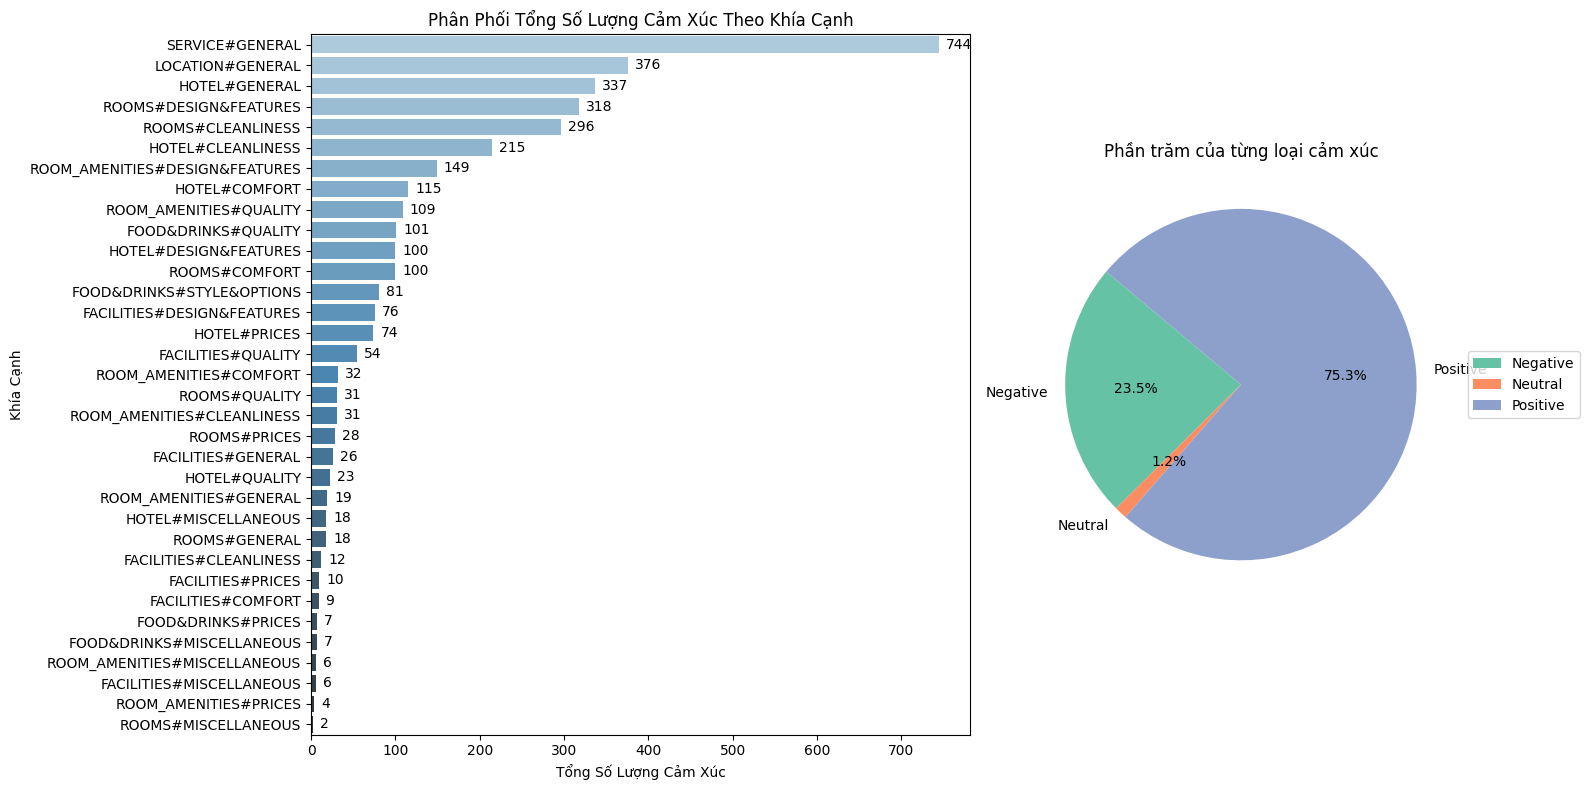

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo figure và axes cho subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [6, 4]})

# Biểu đồ cột
sns.barplot(x='Row_Total', y='Aspect', data=df_train_plot_sorted, palette='Blues_d', ax=axs[0])
axs[0].set_title('Phân Phối Tổng Số Lượng Cảm Xúc Theo Khía Cạnh')
axs[0].set_xlabel('Tổng Số Lượng Cảm Xúc')
axs[0].set_ylabel('Khía Cạnh')
# Adding value labels to the bar plot
for p in axs[0].patches:
    axs[0].annotate(f'{int(p.get_width())}', 
                   (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                   ha='left', va='center', xytext=(5, 0), textcoords='offset points')
sizes = [832,41,2661]

# Biểu đồ tròn
colors = sns.color_palette('Set2')
axs[1].pie(sizes, labels=['Negative','Neutral','Positive'], autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Phần trăm của từng loại cảm xúc')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


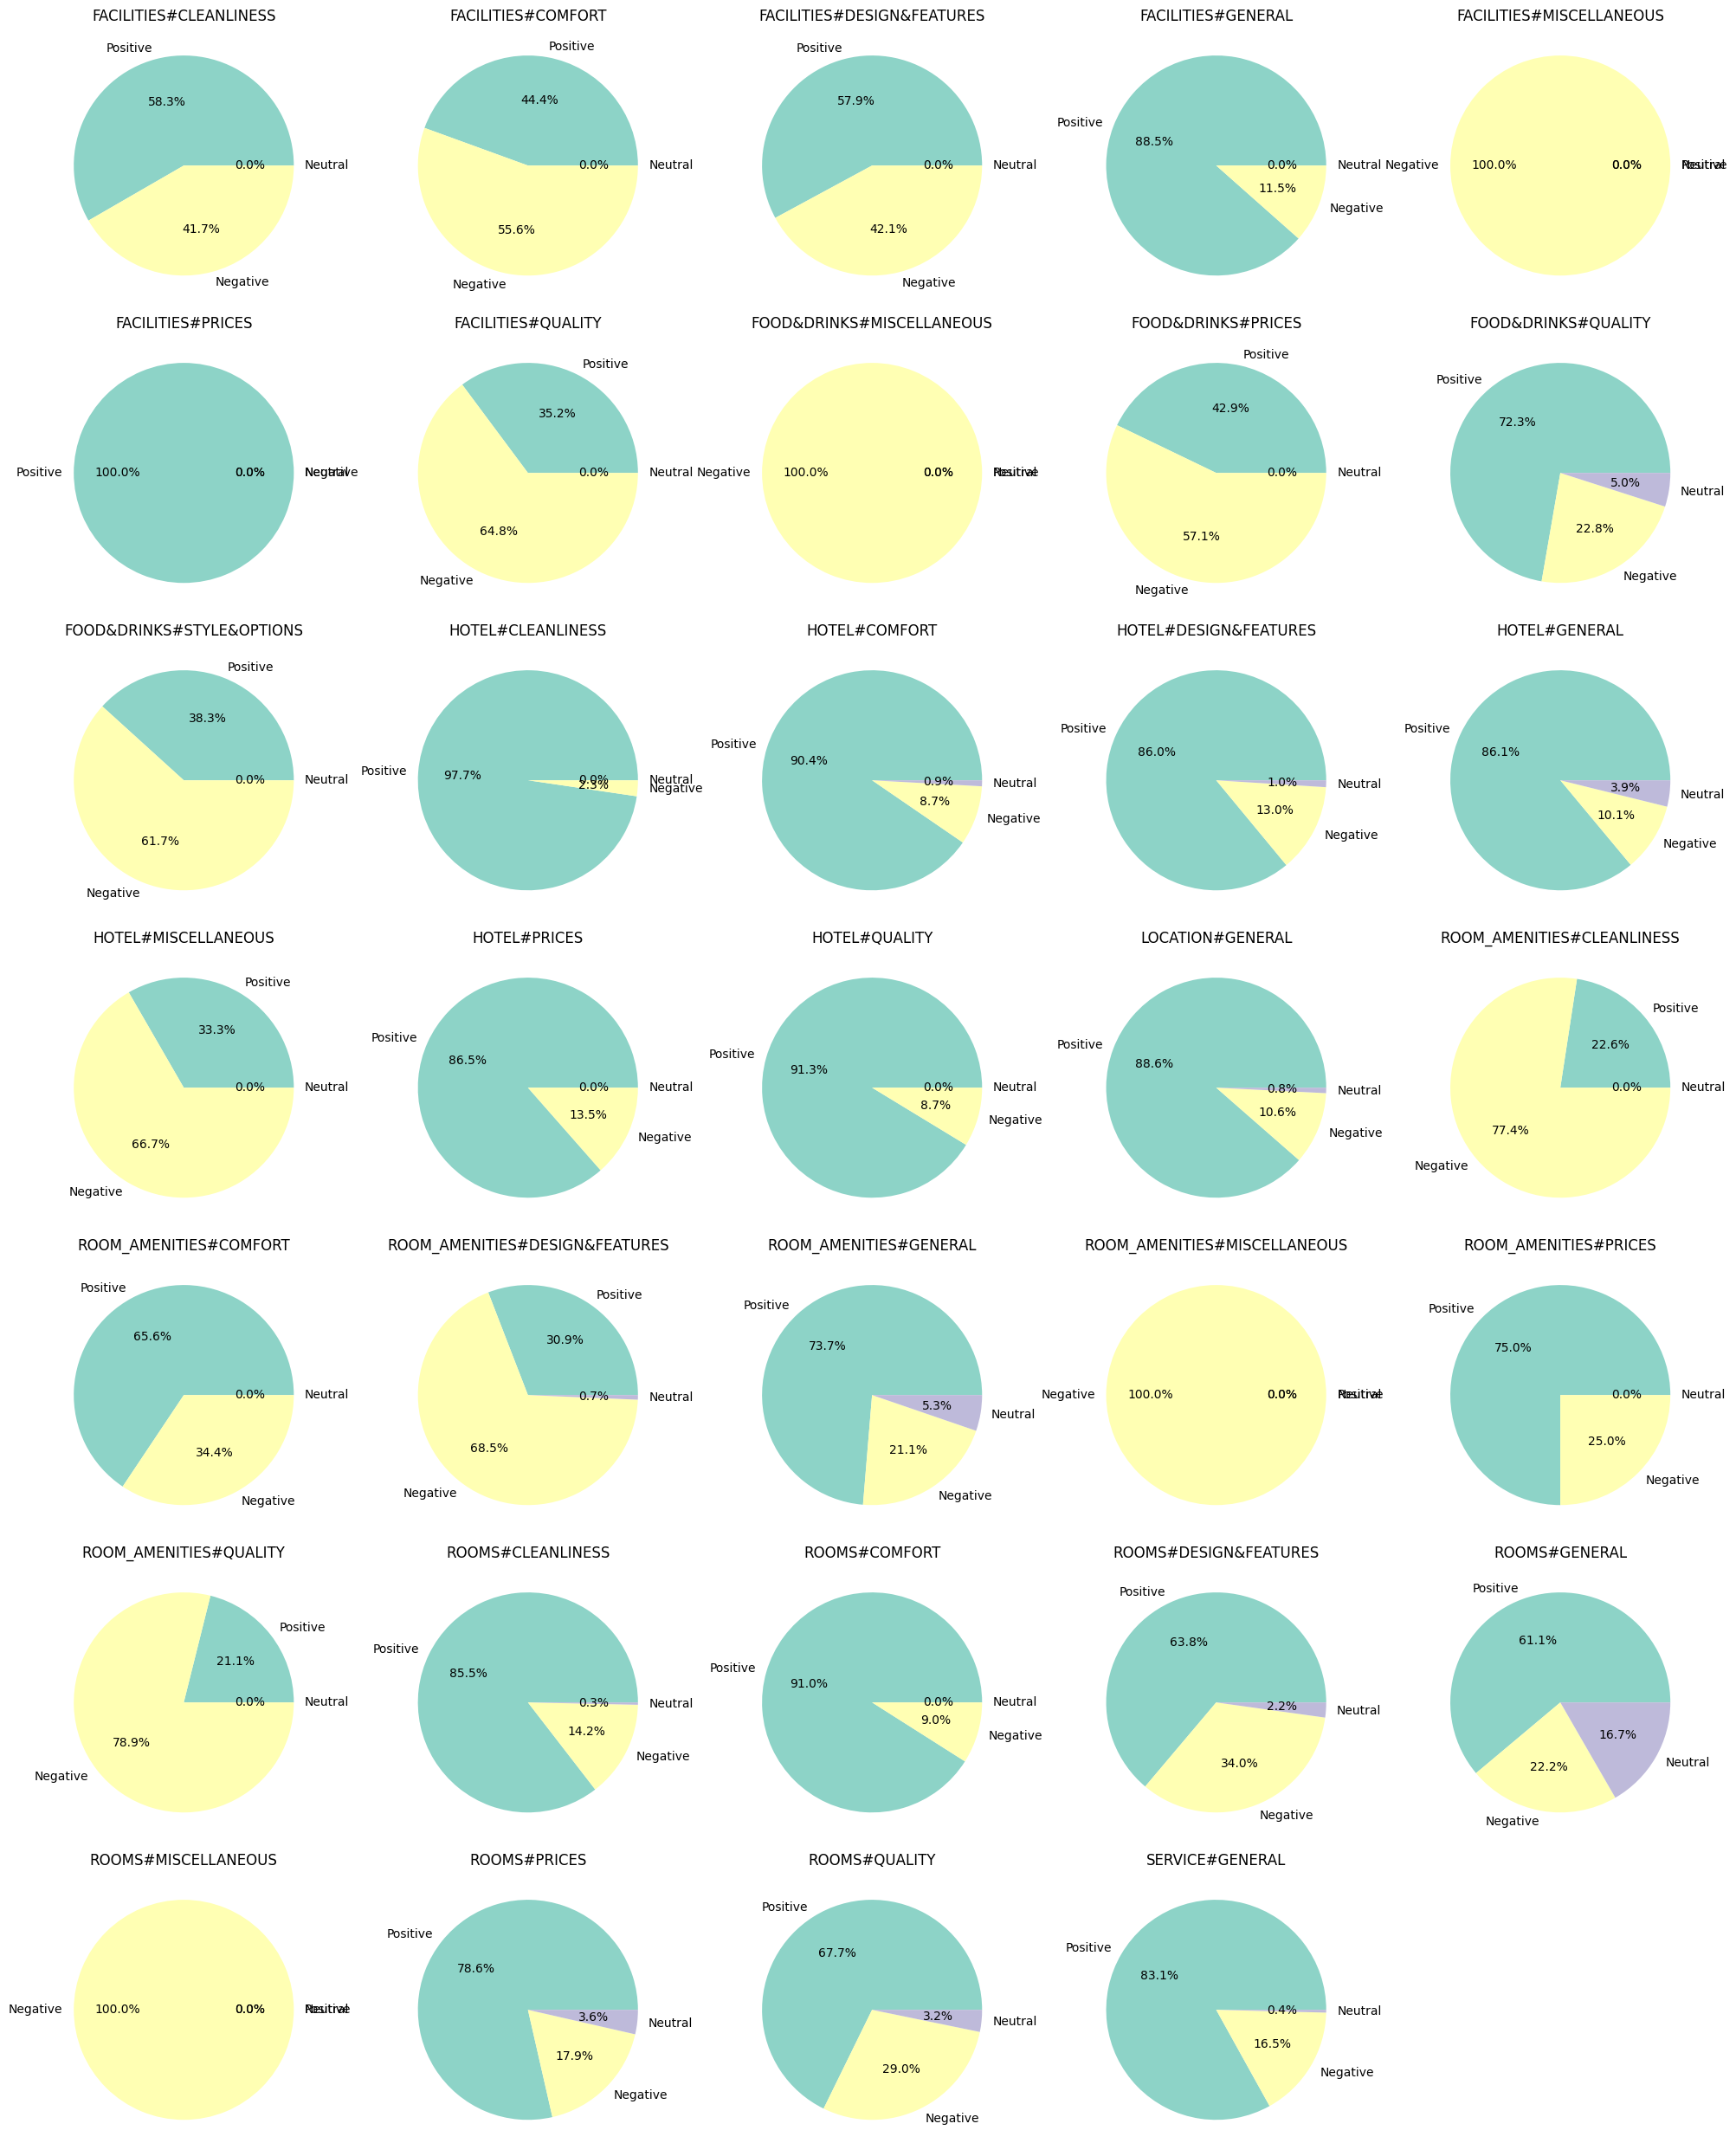

In [56]:
# Define colors for sentiments
colors = sns.color_palette('Set3')

# Create subplots
fig, axes = plt.subplots(7, 5, figsize=(20, 25))

# Flatten axes array to simplify indexing
axes = axes.flatten()

# Iterate over each aspect and create a pie chart
for i, aspect in enumerate(df_train_plot['Aspect']):
    positive = df_train_plot['Positive'][i]
    negative = df_train_plot['Negative'][i]
    neutral = df_train_plot['Neutral'][i]

    # Plot a pie chart for the current aspect
    axes[i].pie([positive, negative, neutral], labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%', colors=colors)
    axes[i].set_title(f'{aspect}')

# Hide empty subplots
for i in range(len(df_train_plot['Aspect']), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## **EDA TEXT**

In [57]:
# Hàm để tách và tính kích thước từ vựng
def get_vocab_size(series):
    # Tách tất cả các từ trong series và chuyển đổi thành một list duy nhất
    all_words = series.str.split(expand=True).stack().unique()
    # Đếm số lượng từ duy nhất
    vocab_size = len(all_words)
    return vocab_size

In [66]:
df_test = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/data/data_hotel/test.csv")
df_val = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/data/data_hotel/val.csv")

In [70]:
df_train['word_count'] = df_train['Review'].apply(lambda x: len(x.split()))
df_test['word_count'] = df_test['Review'].apply(lambda x: len(x.split()))
df_val['word_count'] = df_val['Review'].apply(lambda x: len(x.split()))

average_words_train = df_train['word_count'].mean()
average_words_test = df_test['word_count'].mean()
average_words_val = df_val['word_count'].mean()

In [77]:
print(f"Số từ trung bình trong mỗi câu review tập train là: {average_words_train}")
print(f"Số từ trung bình trong mỗi câu review tập val là: {average_words_val}")
print(f"Số từ trung bình trong mỗi câu review tập test là: {average_words_test}")


Số từ trung bình trong mỗi câu review tập train là: 10.9364
Số từ trung bình trong mỗi câu review tập val là: 10.734793187347933
Số từ trung bình trong mỗi câu review tập test là: 11.096


In [73]:
vocab_size_train = get_vocab_size(df_train['Review'])
vocab_size_test = get_vocab_size(df_test['Review'])
vocab_size_val = get_vocab_size(df_val['Review'])

In [74]:
print(f'Vocab size train: {vocab_size_train}')
print(f'Vocab size val: {vocab_size_val}')
print(f'Vocab size test: {vocab_size_test}')

Vocab size train: 3331
Vocab size val: 2266
Vocab size test: 1358


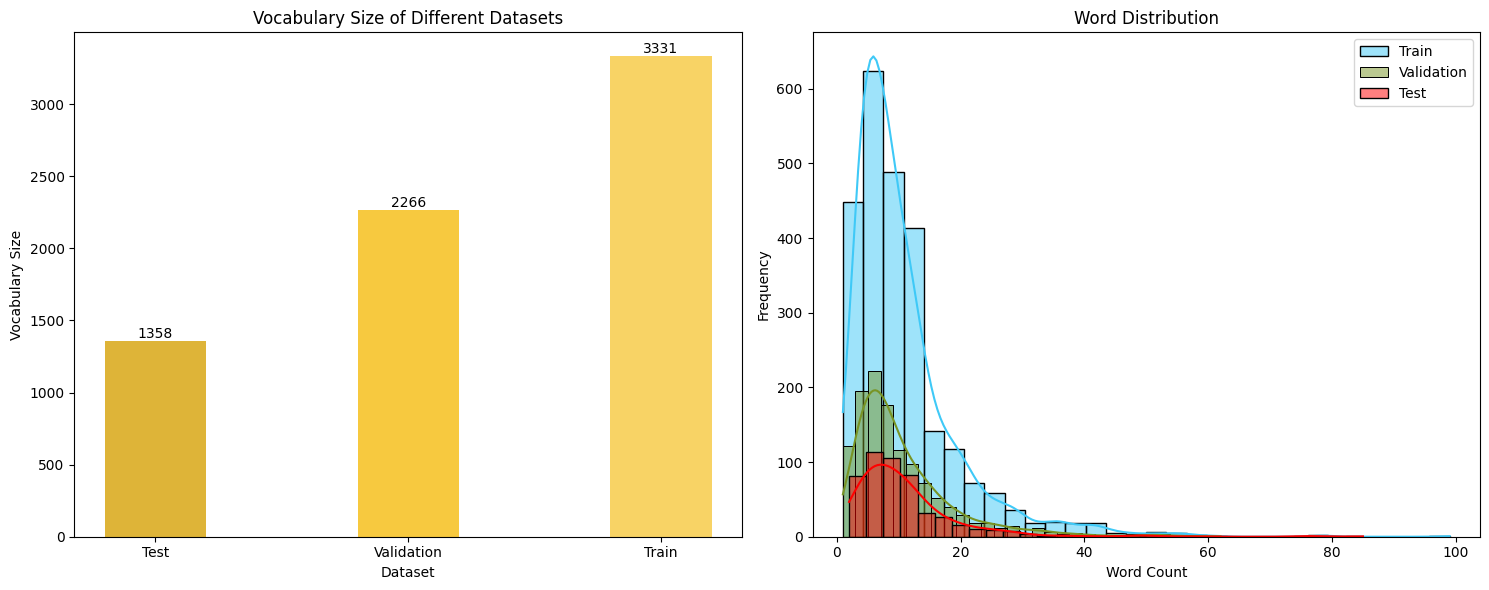

In [75]:
# Danh sách các tên của bộ dữ liệu và giá trị của vocab size
datasets = ['Test', 'Validation', 'Train']
vocab_sizes = [vocab_size_test, vocab_size_val, vocab_size_train]

# Tạo figure và axes cho subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
for i, (dataset, size) in enumerate(zip(datasets, vocab_sizes)):
    axs[0].text(i, size, str(size), ha='center', va='bottom')
# Biểu đồ cột ngang
axs[0].bar(datasets, vocab_sizes, color=['#deb438', '#f7c93f', '#f8d365'], width=0.4)
axs[0].set_xlabel('Dataset')
axs[0].set_ylabel('Vocabulary Size')
axs[0].set_title('Vocabulary Size of Different Datasets')

# Biểu đồ histogram
sns.histplot(df_train['word_count'], color="#3fc9f7", label="Train", bins=30, kde=True, ax=axs[1])
sns.histplot(df_val['word_count'], color="#789425", label="Validation", bins=30, kde=True, ax=axs[1])
sns.histplot(df_test['word_count'], color="red", label="Test", bins=30, kde=True, ax=axs[1])
axs[1].legend()
axs[1].set_title('Word Distribution')
axs[1].set_xlabel('Word Count')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
